In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/Final Transactions.csv')

In [ ]:
df.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


In [ ]:
df.shape

(1754155, 10)

In [ ]:
del df[df.columns[0]]

# Entendimento dos dados

O conjunto de dados consiste em 1,75 milhão de transações feitas considerando usuários simulados por meio de vários terminais ao longo do período de janeiro de 2023 a junho de 2023. No entanto, os dados são altamente desbalanceados, com apenas uma pequena porcentagem (0,1345%) de transações classificadas como fraudulentas.


## EDA

In [ ]:
df.info()
#Transformar a coluna 'TX_DATETIME' em datetime (está em object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TRANSACTION_ID     int64         
 1   TX_DATETIME        datetime64[ns]
 2   CUSTOMER_ID        int64         
 3   TERMINAL_ID        int64         
 4   TX_AMOUNT          float64       
 5   TX_TIME_SECONDS    int64         
 6   TX_TIME_DAYS       int64         
 7   TX_FRAUD           int64         
 8   TX_FRAUD_SCENARIO  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 133.8 MB


In [ ]:
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

In [ ]:
df.describe()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
count,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06
mean,8.770770e+05,2.504011e+03,4.996733e+03,5.396820e+02,7.903234e+06,9.097260e+01,1.345200e-01,1.449746e-01
std,5.063811e+05,1.445987e+03,2.886101e+03,1.179711e+03,4.565172e+06,5.283709e+01,3.412103e-01,3.874872e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.385385e+05,1.252000e+03,2.502000e+03,1.799500e+02,3.940846e+06,4.500000e+01,0.000000e+00,0.000000e+00
50%,8.770770e+05,2.506000e+03,4.994000e+03,4.217500e+02,7.902670e+06,9.100000e+01,0.000000e+00,0.000000e+00
75%,1.315616e+06,3.765000e+03,7.495000e+03,7.505950e+02,1.186566e+07,1.370000e+02,0.000000e+00,0.000000e+00
max,1.754154e+06,4.999000e+03,9.999000e+03,6.478375e+05,1.581120e+07,1.820000e+02,1.000000e+00,3.000000e+00


In [ ]:
df.isnull().sum()

TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

In [ ]:
#Verificar e excluir dados ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
df.dropna(subset=['TX_FRAUD'], axis=0, inplace=True)
df.head(2)

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0


In [ ]:
fraude_ = df['TX_FRAUD'].value_counts()
fraude_

0    1518186
1     235969
Name: TX_FRAUD, dtype: int64

In [ ]:
fraude = fraude_[0]
n_fraude = fraude_[1]
porc_fraude = fraude_[0]/(fraude_[0] + fraude_[1])*100
porc_nfraude = fraude_[1]/(fraude_[1] + fraude_[0])*100
print('N_fraudes: {} ({:.2f}%)'.format(fraude,porc_fraude))
print('fraudes: {} ({:.2f}%)'.format(n_fraude,porc_nfraude))

N_fraudes: 1518186 (86.55%)
fraudes: 235969 (13.45%)


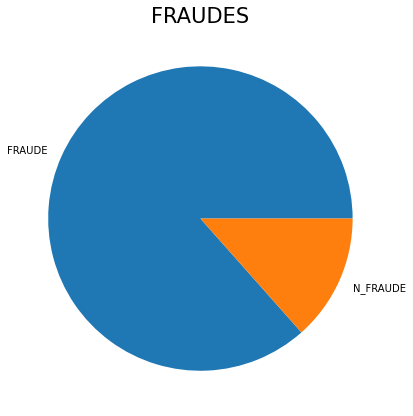

In [ ]:
fig = plt.figure(figsize=(7,7))
fraude_ = df['TX_FRAUD'].value_counts()
fraude_num = [fraude_[0],fraude_[1]]
plt.pie(fraude_num, labels=['FRAUDE','N_FRAUDE'])
plt.title('FRAUDES',fontsize=21);

INSIGHTS

*   Temos 235969 (13,45%) de fraudes nesses dados;
*   Criar um modelo que identifique a fraude;
*   Váriavel target é a "TX_FRAUDE";






In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
TRANSACTION_ID,1.000000,-0.000389,-0.000690,0.002455,0.999999,0.999985,0.002650,0.004748
CUSTOMER_ID,-0.000389,1.000000,0.000389,-0.002633,-0.000389,-0.000389,0.004353,0.002359
TERMINAL_ID,-0.000690,0.000389,1.000000,-0.000758,-0.000690,-0.000690,-0.002160,-0.003291
TX_AMOUNT,0.002455,-0.002633,-0.000758,1.000000,0.002453,0.002449,0.313427,0.416883
TX_TIME_SECONDS,0.999999,-0.000389,-0.000690,0.002453,1.000000,0.999992,0.002650,0.004746
TX_TIME_DAYS,0.999985,-0.000389,-0.000690,0.002449,0.999992,1.000000,0.002650,0.004746
TX_FRAUD,0.002650,0.004353,-0.002160,0.313427,0.002650,0.002650,1.000000,0.949008
TX_FRAUD_SCENARIO,0.004748,0.002359,-0.003291,0.416883,0.004746,0.004746,0.949008,1.000000
